In [24]:
import pandas as pd
import empath
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [26]:
subreddit_control = 'UkrainianConflict'
type_of_content = 'submissions'

conspiracy_file = open(f"./data/conspiracy_ukraine_wordlist.txt", "r")
conspiracy_words = conspiracy_file.read().split("\n")

control_file = open(f"./data/{subreddit_control}_{type_of_content}_wordlist.txt", "r")
control_words = control_file.read().split("\n")

In [27]:
def plotHotTopics(words, subreddit):
    lexicon = empath.Empath()
    empath_results = lexicon.analyze(words, normalize=True)
    empath_results_sorted = sorted(empath_results.items(), key=lambda x: x[1], reverse=True)

    plt.figure(figsize = (14, 14))

    top_ten = dict(list(empath_results_sorted)[:30])
    labels = list(top_ten.keys())
    values = list(top_ten.values())
    ax = sns.barplot(x=labels, y=values)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.title(f"Most prevalent lexical categories in r/{subreddit}")
    plt.xlabel("top categories")
    plt.ylabel("proportion") #better label
    plt.savefig(f"./images/empath/{subreddit}_empath_{type_of_content}.png")
    return empath_results


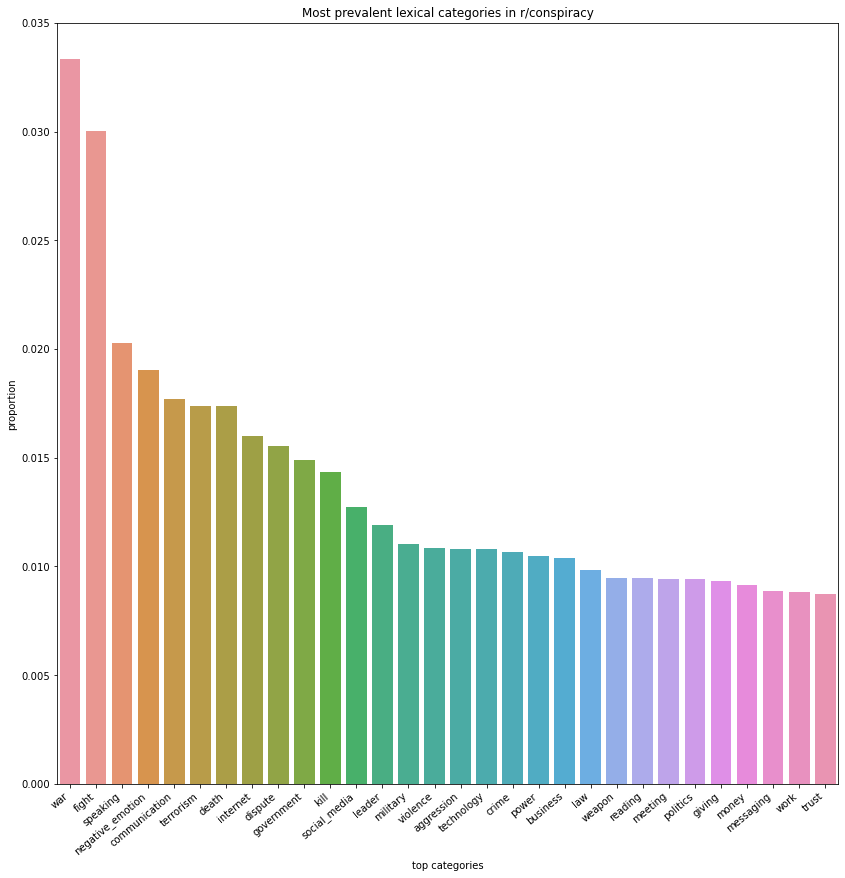

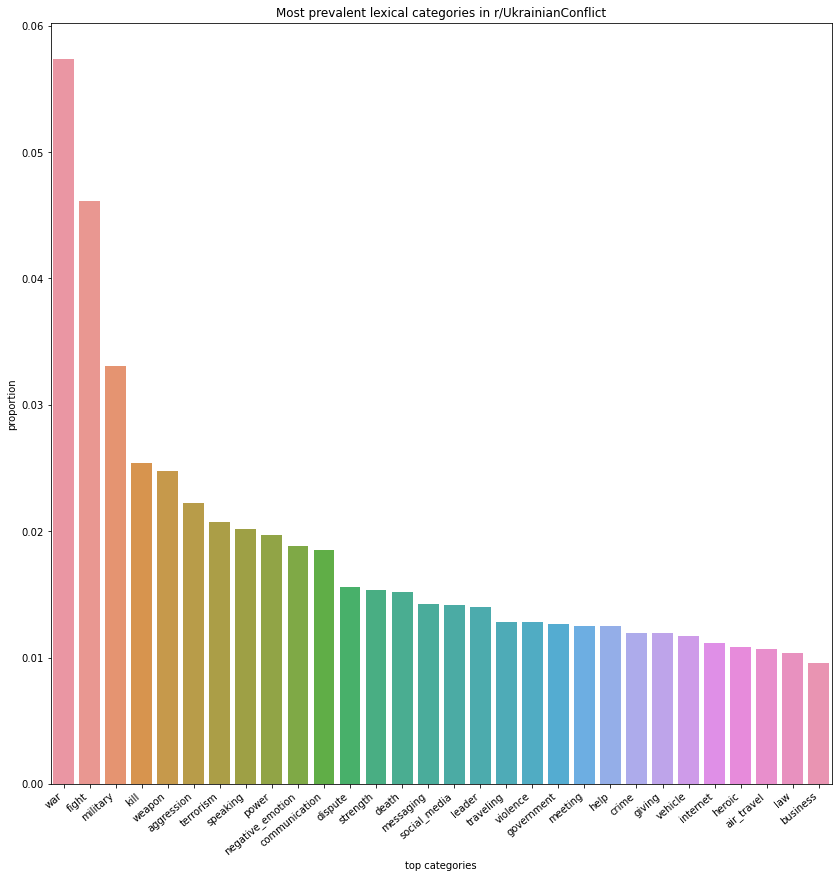

In [28]:
conspiracy_empath = plotHotTopics(conspiracy_words, 'conspiracy')
control_empath = plotHotTopics(control_words, subreddit_control)

0.07741849309694095
[('war', -0.31040989787553375), ('military', -0.28439825637160215), ('fight', -0.20761922251817874), ('weapon', -0.19725460516974427), ('aggression', -0.14784310176111334), ('kill', -0.14307865696514335), ('power', -0.11901808155639226), ('strength', -0.09600873809231118), ('air_travel', -0.09037429344603791), ('vehicle', -0.08813424316240288), ('messaging', -0.06976115882610955), ('traveling', -0.06896418040407971), ('heroic', -0.06174403320984578), ('help', -0.06007725710366563), ('ship', -0.059783053576847454), ('science', 0.05771896180951593), ('internet', 0.06215659022657775), ('reading', 0.0625160194575759), ('deception', 0.06401420131939034), ('health', 0.0735368730694063)]


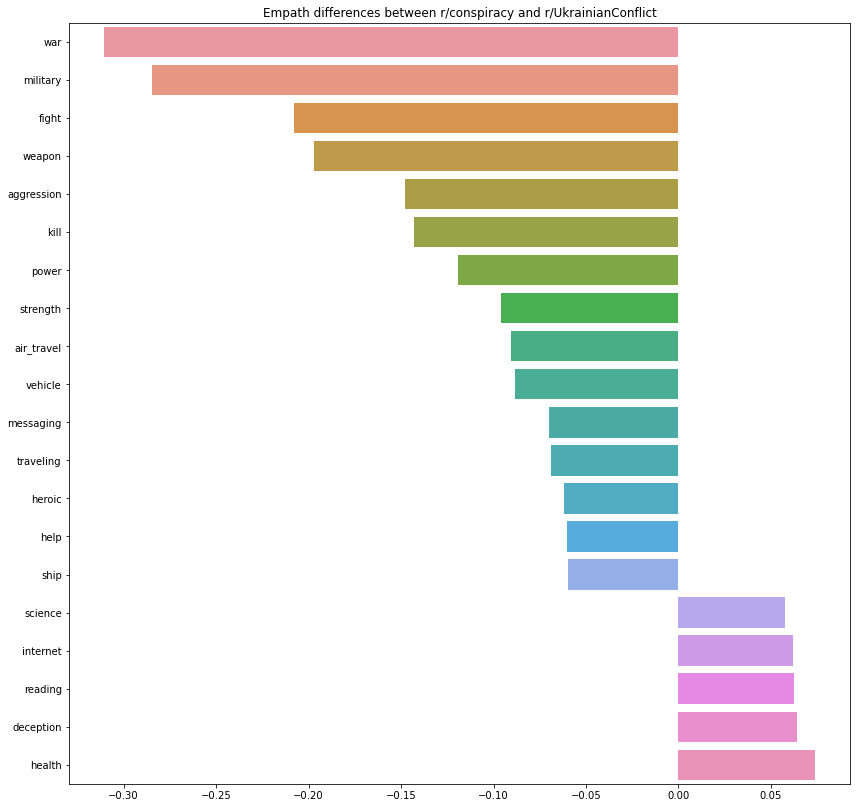

In [29]:
pooled_standard_dev = np.sqrt((np.std(list(conspiracy_empath.values())) + np.std(list(control_empath.values()))) / 2)
print(pooled_standard_dev)


differences = {}
assorted_diffs = {}
for key in conspiracy_empath:
    differences[key] = (conspiracy_empath[key] - control_empath[key]) / pooled_standard_dev
    
for (key, value) in differences.items():
   if abs(value) > 0.05:
       assorted_diffs[key] = value

differences_sorted = sorted(assorted_diffs.items(), key=lambda x: x[1])
print(differences_sorted)

figure = plt.figure(figsize = (14, 14))

#top_ten = dict(list(differences_sorted)[:5] + list(differences_sorted[-5:]))
top_ten = dict(list(differences_sorted))
labels = list(top_ten.keys())
values = list(top_ten.values())
ax = sns.barplot(x=values, y=labels)
plt.title(f"Empath differences between r/conspiracy and r/{subreddit_control}")
plt.savefig(f"./images/empath/empath_differences_conspiracy_{subreddit_control}_{type_of_content}.png")
